In [248]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [250]:
df=pd.read_csv('Airline Delay.csv')

In [252]:
df['carrier_name']

0             Endeavor Air Inc.
1             Endeavor Air Inc.
2             Endeavor Air Inc.
3             Endeavor Air Inc.
4             Endeavor Air Inc.
                 ...           
3346    ExpressJet Airlines LLC
3347    ExpressJet Airlines LLC
3348    ExpressJet Airlines LLC
3349    ExpressJet Airlines LLC
3350    ExpressJet Airlines LLC
Name: carrier_name, Length: 3351, dtype: object

In [254]:
print(df.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


In [256]:
columns_to_remove=['arr_flights','carrier_ct','security_ct','arr_cancelled','arr_diverted']
df = df.drop(columns=columns_to_remove)
df.to_csv("modified1.csv", index=False)

In [258]:
df=pd.read_csv("modified1.csv")

In [260]:
df.groupby('carrier_name')['arr_delay'].mean()

carrier_name
Alaska Airlines Inc.       2437.743056
Allegiant Air              1002.975000
American Airlines Inc.     5956.507538
Delta Air Lines Inc.       4275.511905
Endeavor Air Inc.          1910.101770
Envoy Air                  1772.508772
ExpressJet Airlines LLC    2397.622642
Frontier Airlines Inc.     1264.652174
Hawaiian Airlines Inc.     1060.621622
JetBlue Airways            7206.583333
Mesa Airlines Inc.         2422.808219
PSA Airlines Inc.          2566.588235
Republic Airline           2761.336735
SkyWest Airlines Inc.      3766.179541
Southwest Airlines Co.     7713.165746
Spirit Air Lines           3167.340206
United Air Lines Inc.      4731.879581
Name: arr_delay, dtype: float64

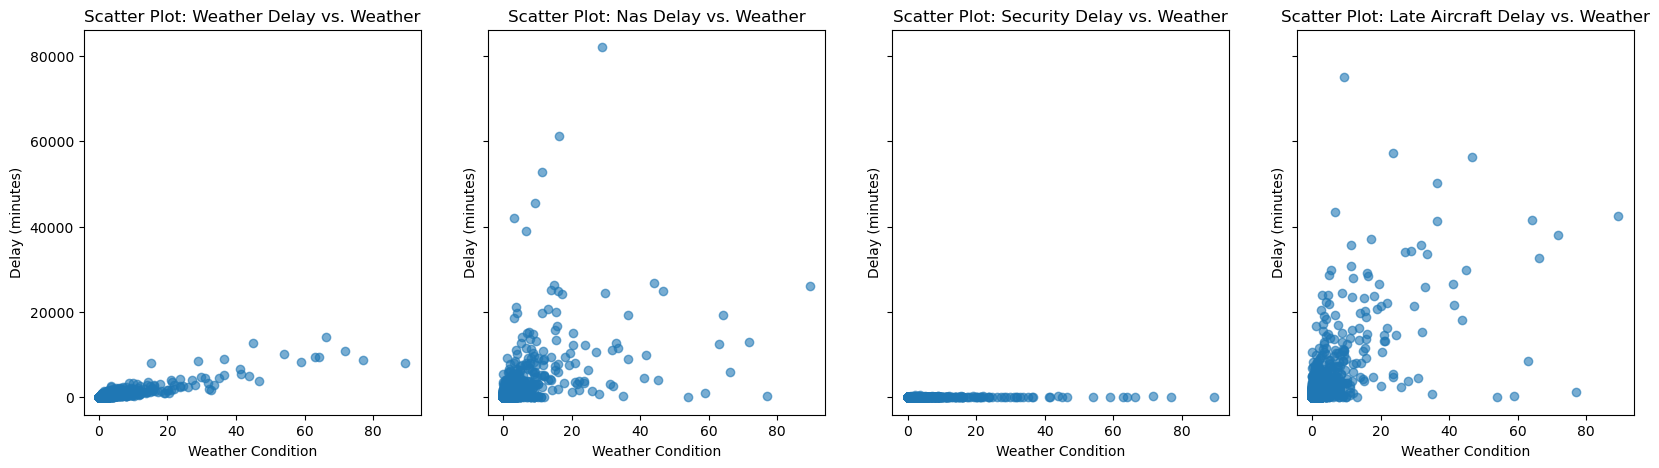

In [262]:
delay_types = ['weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


fig, axs = plt.subplots(1, len(delay_types), figsize=(20, 5), sharey=True)


for i, delay_type in enumerate(delay_types):
    axs[i].scatter(df['weather_ct'], df[delay_type], alpha=0.6)
    axs[i].set_title(f'Scatter Plot: {delay_type.replace("_", " ").title()} vs. Weather')
    axs[i].set_xlabel('Weather Condition')
    axs[i].set_ylabel('Delay (minutes)')



plt.show()

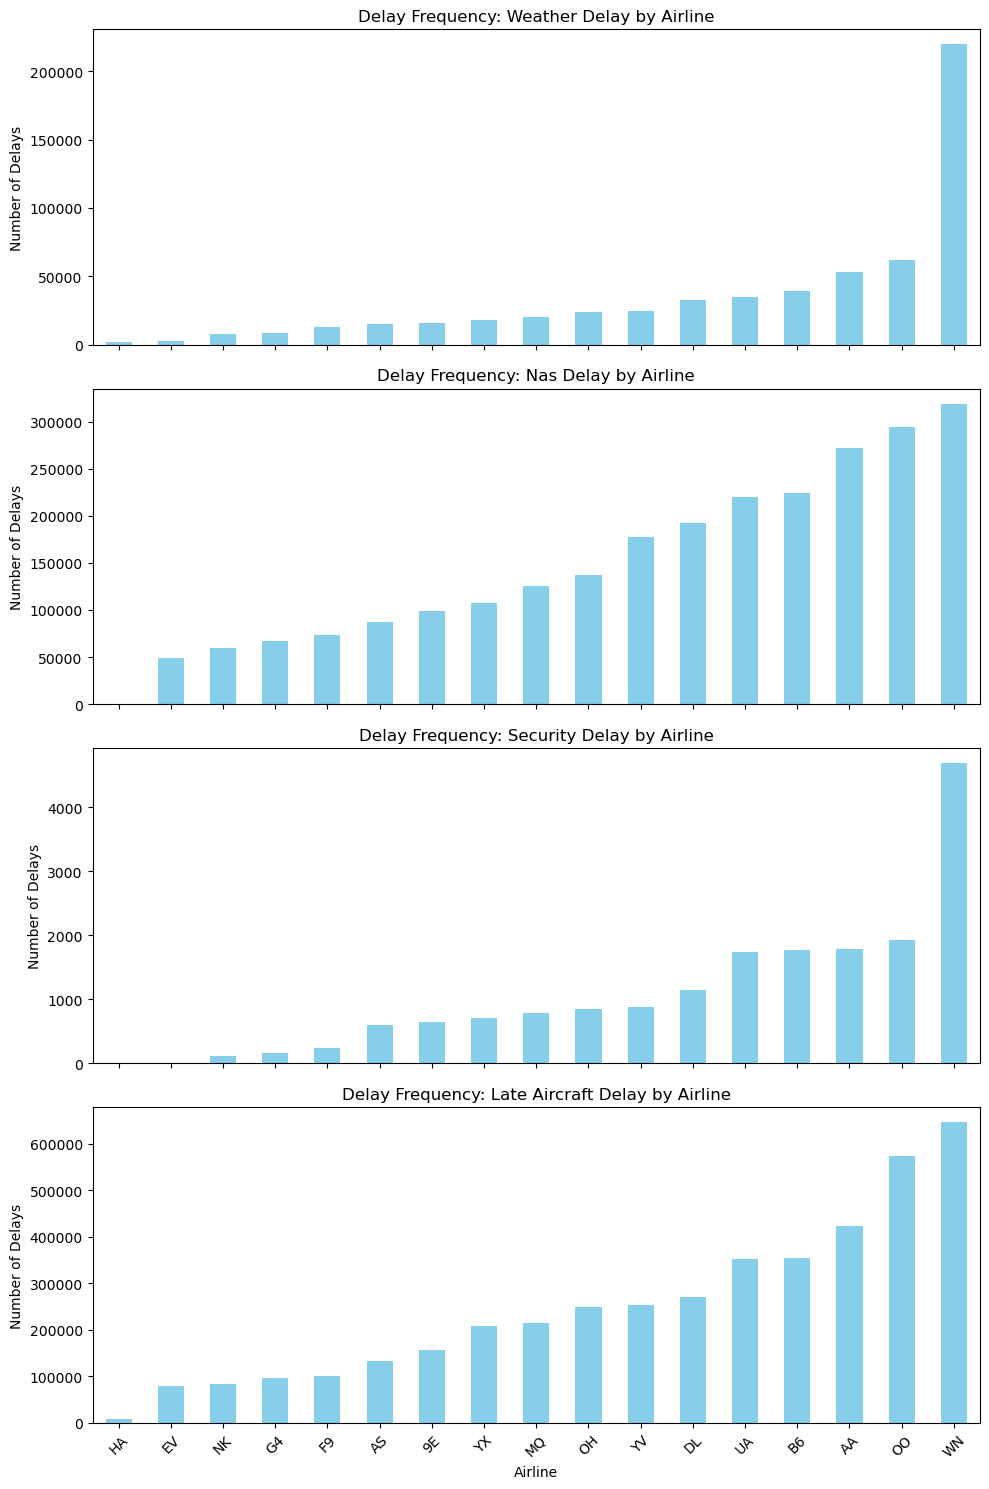

In [264]:
delay_types = ['weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

fig, axs = plt.subplots(len(delay_types), 1, figsize=(10, 15), sharex=True)

for i, delay_type in enumerate(delay_types):
    delay_count = df.groupby('carrier')[delay_type].sum().sort_values(ascending=True)
    delay_count.plot(kind='bar', ax=axs[i], color='skyblue')
    axs[i].set_title(f'Delay Frequency: {delay_type.replace("_", " ").title()} by Airline')
    axs[i].set_ylabel('Number of Delays')
    axs[i].set_xlabel('Airline')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [266]:
df=pd.read_csv('Airline Delay.csv')

req_coms=['carrier','carrier_name','airport', 'airport_name','weather_ct','weather_delay','security_ct','security_delay']
new_df=df[req_coms]

new_df['delay'] = new_df.apply(lambda row: 1 if row['weather_delay'] > 0 or row['security_delay'] > 0 else 0, axis=1)

new_df.to_csv('modified2.csv', index=False)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15008\610643492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['delay'] = new_df.apply(lambda row: 1 if row['weather_delay'] > 0 or row['security_delay'] > 0 else 0, axis=1)


In [268]:
df=pd.read_csv('modified2.csv')
df.head()

,carrier,carrier_name,airport,airport_name,weather_ct,weather_delay,security_ct,security_delay,delay
0,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",0.0,0.0,0.0,0.0,0
1,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",0.0,0.0,0.0,0.0,0
2,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",0.0,0.0,0.0,0.0,0
3,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",0.0,0.0,0.0,0.0,0
4,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",0.0,0.0,0.0,0.0,0


In [270]:
df.columns

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'weather_ct',
       'weather_delay', 'security_ct', 'security_delay', 'delay'],
      dtype='object')

In [276]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

le = LabelEncoder()
df['carrier_name'] = le.fit_transform(df['carrier_name'])

# Drop rows with missing target values if too many
df = df.dropna(subset=['delay'])

# Handle missing values in the target variable
imputer = SimpleImputer(strategy='most_frequent') # Impute with the most frequent value
df['delay'] = imputer.fit_transform(df[['delay']])
y
# Features and target
X = df[['carrier_name', 'weather_ct','security_ct']]
y = df['delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[389   0]
 [  1 448]]
Accuracy: 0.9988066825775657
Precision: 0.9988097423658282
Recall: 0.9988066825775657
F1 Score: 0.9988067833352302


In [280]:
new_data = pd.DataFrame({
    'carrier_name': [10],  # Example carrier name
    'weather_ct': [15] ,                    # Example weather condition value
    'security_ct':[6]
})

# Encode the carrier_name using the same LabelEncoder used earlier
new_data['carrier_name'] = le.transform(new_data['carrier_name'])

# Make predictions
prediction = rf.predict(new_data)

if prediction[0] == 1:
    print(f"Prediction: No delay (Probability: {prediction[0]:.2f})")
else:
    print(f"Prediction: Delay likely (Probability: {1 - prediction[0]:.2f})")

Prediction: No delay (Probability: 1.00)
